# Análise de Dados Exploratória da ANAC

![ANAC](imgs/anac-logo.png "Logo ANAC")

# 1. Introdução

Este estudo tem como objetivo analisar um conjunto de dados de voos internacionais registrados pela Agência Nacional de Aviação Civil (ANAC) do Brasil, durante o período de janeiro de 2015 a agosto de 2017. 

A ANAC é a agência reguladora responsável pela aviação civil no país, e as informações contidas nesses dados são de grande importância para a compreensão da dinâmica da aviação internacional no Brasil, bem como para a tomada de decisões estratégicas no setor. O conjunto de dados inclui informações como o número do voo, nome da companhia aérea, horários de partida e chegada previstos e reais, situação do voo e localização dos aeroportos de origem e destino, entre outros. Esses dados permitem uma análise detalhada das tendências e padrões de voos internacionais no Brasil, bem como a identificação de fatores que possam influenciar o desempenho da aviação internacional no país.

## 1.1. Objetivos

O objetivo deste estudo é realizar uma Análise Exploratória dos Dados (Exploratory Data Analysis - EDA) do conjunto de dados disposto em [bases/](bases/), e analisar dados de voos internacionais rastreados pela ANAC.

Com base nas informações disponíveis, pretendemos avaliar o desempenho das companhias aéreas em relação ao cumprimento dos horários previstos de partida e chegada, bem como investigar a frequência de cancelamentos e as justificativas apresentadas para esses casos. 

Também vamos examinar as rotas mais utilizadas e os destinos mais comuns para os voos internacionais saindo do Brasil, bem como avaliar a pontualidade e a eficiência dos aeroportos de origem e destino. 

1. [Qual destino mais procurado nas férias?](#analisedados.1)
2. [Principais destinos nacionais julho, dezembro e janeiro](#Análise2)
3. [Principais destinos internacionais julho, dezembro e janeiro.](#Análise3)
4. [Análise 4](#Análise4)


# 2. Metodologia

Nesta seção será apresentado todo o processo de preparação, organização e limpeza de dados feito no *dataset* que possui os seguintes dados brutos. Ao final desta, apresentaremos os dados padronizados e devidamente tratados:

|        Coluna        | Tipo |                         Descrição                         |
|:--------------------:|:----:|:---------------------------------------------------------:|
|         Voos         |  str |                       Número do voo                       |
|    Companhia.Aerea   |  str |                  Nome da companhia aérea                  |
|   Codigo.Tipo.Linha  |  str |          Código do tipo de linha (internacional)          |
|   Partida.Prevista   |  str |                Horário previsto de partida                |
|     Partida.Real     |  str |                  Horário real de partida                  |
|   Chegada.Prevista   |  str |                Horário previsto de chegada                |
|     Chegada.Real     |  str |                  Horário real de chegada                  |
|     Situacao.Voo     |  str |        Situação do voo (realizado, cancelado, etc)        |
| Codigo.Justificativa |  str | Código de justificativa (caso o voo tenha sido cancelado) |
|   Aeroporto.Origem   |  str |               Código do aeroporto de origem               |
|     Cidade.Origem    |  str |                      Cidade de origem                     |
|     Estado.Origem    |  str |                      Estado de origem                     |
|      Pais.Origem     |  str |                       País de origem                      |
|   Aeroporto.Destino  |  str |               Código do aeroporto de destino              |
|    Cidade.Destino    |  str |                     Cidade de destino                     |
|    Estado.Destino    |  str |                     Estado de destino                     |
|     Pais.Destino     |  str |                      País de destino                      |
|       LongDest       |  str |             Longitude do aeroporto de destino             |
|        LatDest       |  str |              Latitude do aeroporto de destino             |
|       LongOrig       |  str |              Longitude do aeroporto de origem             |
|        LatOrig       |  str |              Latitude do aeroporto de origem              |


## 2.1. Configuração do Ambiente

### 2.1.1. Bibliotecas e Ferramentas Necessárias (Built-ins)

1. ```os```:       Para manipular os arquivos de base e seus respectivos diretórios de forma multiplataforma e eficiente.
2. ```re```:       Utilizado em expressões regulares durante o processo de limpeza dos dados.
3. ```enum```:     Auxilia nos processos de padronizar e regular algumas convenções do projeto.
4. ```datetime```: Auxilia nos processos de padronizar e regular algumas convenções do projeto

### 2.1.2. Bibliotecas e Ferramentas Necessárias (pip)

1. Pandas: Para manipular e exibir os dados de forma coesa e relata.   
    ```pip install pandas```       
    ```import pandas as pd```

2. JinJa2: Complemento de estilização do Pandas.   
    ```pip install Jinja2```

3. Matplotlib: Para exibição visual dos dados por meio de gráficos.   
    ```pip install matplotlib```   
    ```import matplotlib.pyplot as plt```

4. DescricaoColuna e DescricaoTipo: São classes estáticas compostar por Enums estabelecidos com base nas convenções de nome das colunas do *dataset*.   
   **Utils** possui complementos para tratativas de alguns campos.   
    ```from libs.utils import Utils```

### 2.1.3. Importações gerais para o projeto

In [1]:
import os
import re
import time
import pandas as pd
import numpy as np
from libs.utils import Utils, Plot, AnacVoos

## 2.2. Carregamento da base

In [2]:
caminho = os.path.join(
    os.path.dirname(
        os.path.abspath(
            os.path.join(__name__, '.'))), 'bases')

arquivos = [arquivo for arquivo in os.listdir(
    caminho) if arquivo.endswith(".csv")]

dataframes = [pd.read_csv(os.path.join(caminho, arquivo))
              for arquivo in arquivos]

AnacVoos.dados = pd.concat(dataframes)
AnacVoos.total_arquivos = len(arquivos)
AnacVoos.dados_solidos = False
AnacVoos.total_registros = len(AnacVoos.dados.index)
AnacVoos.tempo_execucao = time.time()

## 2.3. Organização e Limpeza dos Dados

### 2.3.1. Padrozinação dos nomes das colunas

In [3]:
nomes_colunas_tratadas = []

for coluna in AnacVoos.dados.columns:
    if any(char.isupper() for char in coluna):
        if coluna == 'Voos':
            coluna = 'Num.Voo'
        nomes_colunas_tratadas.append('_'.join(word.lower() for word in re.findall(
            '[A-Z][^A-Z]*', coluna)).lower().replace('.', ''))

AnacVoos.dados.columns = nomes_colunas_tratadas

### 2.3.2. Padrozinação dos tipos das colunas de data/hora, string e númericos

In [4]:
for coluna in AnacVoos.dados.columns:
    tipo = Utils.tipo_coluna(coluna)
    if tipo.__name__ == 'datetime': 
        AnacVoos.dados = Utils.formatar_colunas_datetime(AnacVoos.dados, coluna)

### 2.3.3. Padrozinação no nome das companhias aérea.

In [5]:
AnacVoos.dados['companhia_aerea'] = AnacVoos.dados.apply(
    lambda row: Utils.nome_companhia_aerea_normalizado(
        row['companhia_aerea'],
    ), axis=1)

### 2.3.4. Feature Engineering
A engenharia de recursos (*Feature Engineering*) é o processo de usar o conhecimento do domínio para extrair recursos dos dados brutos. Neste estudo serão acrescentadas as seguintes colunas para enriquecer a análise de dados:

| Coluna         | Descrição                                                            | Base         |
|:--------------:|:--------------------------------------------------------------------:|:--------------:|
| partida_atrasou | Houve atraso na partida (S/N)                                       | `partida_prevista - partida_real` |
| chegada_atrasou | Houve atraso na chegada (S/N)                                       | `chegada_prevista - chegada_real` |
| distancia_km   | Distância total em kms da origem ao destino                          | `lat_long_orig - lat_long_dest` |
| justificativa_atraso   | Informação e correlata à justificativa no atraso do voo      | `codigo_justificativa` |
| justificativa_cancelamento   | Informação e correlata à justificativa do cancelamento do voo| `codigo_justificativa` |
| rota           | Origem x Destino                                                     | `x_origem + x_destino` |
| periodo_ferias           | Contém o mês condizente a um período de férias (Janeiro, Julho ou Dezembro)    | `partida_prevista` **in** [1, 7, 12]  |
| Dia Semana           | Contém o dia da semana para data de partida    | `partida_prevista`  |

#### 2.3.3.1. Atraso na partida

In [6]:
AnacVoos.dados['partida_atrasou'] = AnacVoos.dados.apply(
    lambda row: Utils.validar_atraso(
        row['situacao_voo'],
        row['partida_prevista'],
        row['partida_real']
    ), axis=1)

#### 2.3.3.2. Atraso na chegada

In [7]:
AnacVoos.dados['chegada_atrasou'] = AnacVoos.dados.apply(
    lambda row: Utils.validar_atraso(
        row['situacao_voo'],
        row['chegada_prevista'],
        row['chegada_real']
    ), axis=1)

##### 2.3.3.2.1. Contextualizando campo situação do voo

In [8]:
AnacVoos.dados['situacao_voo'] = AnacVoos.dados.apply(
    lambda row: Utils.atualizar_situacao_voo(
        row['situacao_voo'], 
        row['partida_atrasou'], 
        row['chegada_atrasou']
    ), axis=1)

#### 2.3.3.3. Calculando a distancia em km (para *lat_long_orig* e *lat_long_dest*)

In [9]:
AnacVoos.dados['distancia_km'] = AnacVoos.dados.apply(
    lambda row: Utils.calcular_distancia_km(
        row['lat_orig'],
        row['long_orig'],
        row['lat_dest'],
        row['long_dest']
    ), axis=1)

#### 2.3.3.4. Justificativa atraso

In [10]:
AnacVoos.dados['justificativa_atraso'] = AnacVoos.dados.apply(
    lambda row: Utils.atualizar_justificativa_atraso(
        row['partida_atrasou'],
        row['chegada_atrasou'],
        row['codigo_justificativa']
    ), axis=1
)

#### 2.3.3.5. Justificativa cancelamento

In [11]:
AnacVoos.dados['justificativa_cancelamento'] = AnacVoos.dados.apply(
    lambda row: Utils.atualizar_justificativa_cancelamento(
        row['situacao_voo'],
        row['codigo_justificativa']
    ), axis=1
)

#### 2.3.3.6. Rota

In [12]:
AnacVoos.dados['rota'] = AnacVoos.dados.apply(
    lambda row: Utils.criar_rota(
        row['codigo_tipo_linha'],
        row['pais_origem'],
        row['pais_destino'],
        row['estado_origem'],
        row['estado_destino'],
        row['cidade_origem'],
        row['cidade_destino']
        ), axis=1
    )

#### 2.3.3.7. Período Férias

In [13]:
AnacVoos.dados['periodo_ferias'] = Utils.atribuir_periodo_ferias(AnacVoos.dados['partida_prevista'])

#### 2.3.3.8. Dia Semana

In [14]:
AnacVoos.dados['dia_semana'] = pd.to_datetime(AnacVoos.dados['partida_prevista'], dayfirst=True).dt.strftime('%A')

AnacVoos.dados['dia_semana'] = AnacVoos.dados['dia_semana'].apply(
    lambda row : Utils.atribuir_dia_semana(row)
)

## 2.4. Mapeamento de Dados
Para melhorar a análise e interpretação dos dados os seguintes atributos serão modificados:

| Coluna    | Original     | Modificado                          |
|:----------:|:-------------:|:------------------------------------:|
| *    | 'NA', *      | '', *                  |
| *      | np.NaN / NaN      | ''                  |


### 2.4.1. Removendo 'N/I' por um valor ''/string.empty

In [15]:
for coluna in AnacVoos.dados.columns:
    AnacVoos.dados[coluna] = AnacVoos.dados[coluna].replace('N/I', '')

### 2.4.2. Removendo np.NaN por um valor None

In [16]:
AnacVoos.dados.fillna(value='', inplace=True)

### 2.5. Reordenando as colunas de forma semântica

In [17]:
AnacVoos.dados = AnacVoos.dados.reindex(
    columns=Utils.nomes_colunas(), index=None)
AnacVoos.dados.drop('codigo_justificativa', axis=1, inplace=True)

# garantindo que não houveram alterações no volume de dados
AnacVoos.dados_solidos = len(AnacVoos.dados.index) == AnacVoos.total_registros

### 2.6 Resultado final

In [18]:
columns = ['NomeColuna', 'DescricaoColuna', 'TipoColuna']
values = [[value, Utils.descricao_coluna(value), Utils.tipo_coluna(
    value).__name__] for value in AnacVoos.dados.columns]

pd.DataFrame(data=values, columns=columns).style.set_table_styles([
    dict(selector='th', props=[('text-align', 'center')]),
    dict(selector='td', props=[('text-align', 'center')])
])

,NomeColuna,DescricaoColuna,TipoColuna
0,num_voo,Número do voo,str
1,companhia_aerea,Nome da companhia aérea,str
2,codigo_tipo_linha,Código do tipo de linha (internacional),str
3,rota,Origem x Destino,str
4,periodo_ferias,"Contém o mês condizente a um período de férias (Janeiro, Julho ou Dezembro)",str
5,dia_semana,Contém o dia da semana para data de partida,str
6,aeroporto_origem,Código do aeroporto de origem,str
7,cidade_origem,Cidade de origem,str
8,estado_origem,Estado de origem,str
9,pais_origem,País de origem,str


# 3. Análise dos Dados

## 3.1. Qual destino mais procurado nas férias?
Iremos analisar os principais destinos internacionais e nacionais e os períodos de julho, dezembro e janeiro.

In [30]:
#Dataframe
voos_ferias_agg = AnacVoos.get_voos_ferias_geral(
    filtrar_periodo_ferias = True,
    percentuais = [
        ['tx_realizados', 'realizados_s_atraso'],
        ['tx_atrasos', 'realizados_c_atraso'], 
        ['tx_cancelados', 'cancelados']],
    round = 2,
    cols_groupby=['codigo_tipo_linha', 'periodo_ferias'],
    )

voos_ferias_agg = voos_ferias_agg.reindex(
    columns=['codigo_tipo_linha', 'periodo_ferias', 'voos', 'realizados_s_atraso', 'tx_realizados', 'realizados_c_atraso', 'tx_atrasos', 'cancelados', 'tx_cancelados']
    ).query("periodo_ferias == @periodo").reset_index(drop=True)

for periodo in AnacVoos.periodo_ferias: 
    display(voos_ferias_agg)
    print()

,codigo_tipo_linha,periodo_ferias,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,Internacional,dezembro,7913,6070,0.77,1491,0.19,352,0.04
1,Nacional,dezembro,47381,32908,0.69,10302,0.22,4171,0.09
2,Regional,dezembro,10009,5511,0.55,1696,0.17,2802,0.28


,codigo_tipo_linha,periodo_ferias,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,Internacional,dezembro,7913,6070,0.77,1491,0.19,352,0.04
1,Nacional,dezembro,47381,32908,0.69,10302,0.22,4171,0.09
2,Regional,dezembro,10009,5511,0.55,1696,0.17,2802,0.28


,codigo_tipo_linha,periodo_ferias,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,Internacional,dezembro,7913,6070,0.77,1491,0.19,352,0.04
1,Nacional,dezembro,47381,32908,0.69,10302,0.22,4171,0.09
2,Regional,dezembro,10009,5511,0.55,1696,0.17,2802,0.28


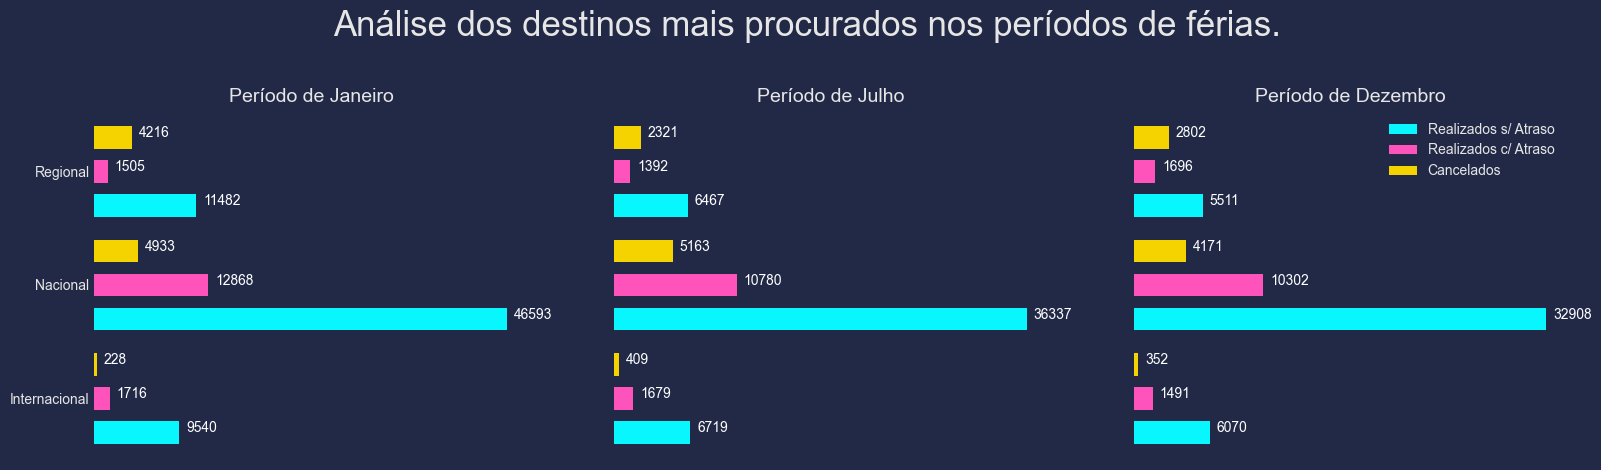

In [20]:
# Plot
Plot.periodo_ferias_geral(
    dataframe=voos_ferias_agg, 
    periodo_ferias=AnacVoos.periodo_ferias,
    grid = False,
    context = 'cyberpunk',
    figsize=(19, 10),
    suptitle = 'Análise dos destinos mais procurados nos períodos de férias.'
    )

### 3.1.1 Principais destinos regionais nos períodos de julho, dezembro e janeiro

In [21]:
#Dataframe
regionais = AnacVoos.get_voos_ferias_tipo_linha(
    codigo_tipo_linha = 'Regional',
    percentuais = [
        ['tx_realizados', 'realizados_s_atraso'],
        ['tx_atrasos', 'realizados_c_atraso'], 
        ['tx_cancelados', 'cancelados']],
    round = 2
)

for periodo in AnacVoos.periodo_ferias:
    print(f"\n\n10 Destinos regionais mais procurados no período de {periodo}:")
    display(regionais.query("periodo_ferias == @periodo").nlargest(10, 'voos').reset_index(drop=True))



10 Destinos regionais mais procurados no período de janeiro:


,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,janeiro,Rio De Janeiro - Guarulhos,340.579878,376,322,0.86,39,0.10,15,0.04
1,janeiro,Guarulhos - Rio De Janeiro,339.818977,197,144,0.73,37,0.19,16,0.08
2,janeiro,Confins - Guarulhos,496.078093,197,159,0.81,33,0.17,5,0.03
3,janeiro,Sao Paulo - Confins,523.919633,153,129,0.84,3,0.02,21,0.14
4,janeiro,Guarulhos - Confins,496.078093,149,123,0.83,18,0.12,8,0.05
5,janeiro,Confins - Sao Paulo,523.919633,141,116,0.82,5,0.04,20,0.14
6,janeiro,Rio De Janeiro - Vitoria,418.842663,139,129,0.93,5,0.04,5,0.04
7,janeiro,Belo Horizonte - Campinas,481.475842,129,72,0.56,0,0.00,57,0.44
8,janeiro,Salvador - Vitoria Da Conquista,349.205276,127,83,0.65,34,0.27,10,0.08
9,janeiro,Belem - Altamira,467.847645,127,91,0.72,10,0.08,26,0.20




10 Destinos regionais mais procurados no período de julho:


,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,julho,Rio De Janeiro - Guarulhos,339.844723,235,168,0.71,36,0.15,31,0.13
1,julho,Guarulhos - Ribeirao Preto,288.447260,120,73,0.61,20,0.17,27,0.22
2,julho,Ribeirao Preto - Guarulhos,288.447260,120,53,0.44,40,0.33,27,0.22
3,julho,Brasilia - Ribeirao Preto,585.634278,117,39,0.33,6,0.05,72,0.62
4,julho,Ribeirao Preto - Brasilia,585.634278,117,41,0.35,4,0.03,72,0.62
5,julho,Belo Horizonte - Campinas,481.475842,109,10,0.09,0,0.00,99,0.91
6,julho,Guarulhos - Rio De Janeiro,337.570215,97,72,0.74,21,0.22,4,0.04
7,julho,Florianopolis - Sao Paulo,487.777303,96,74,0.77,13,0.14,9,0.09
8,julho,Confins - Guarulhos,496.078093,96,72,0.75,19,0.20,5,0.05
9,julho,Confins - Sao Paulo,523.919633,95,76,0.80,11,0.12,8,0.08




10 Destinos regionais mais procurados no período de dezembro:


,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,dezembro,Rio De Janeiro - Guarulhos,339.754153,210,150,0.71,37,0.18,23,0.11
1,dezembro,Guarulhos - Rio De Janeiro,338.944871,124,75,0.60,36,0.29,13,0.10
2,dezembro,Guarulhos - Ribeirao Preto,288.447260,110,61,0.55,40,0.36,9,0.08
3,dezembro,Ribeirao Preto - Guarulhos,288.447260,110,52,0.47,50,0.45,8,0.07
4,dezembro,Brasilia - Ribeirao Preto,585.634278,107,28,0.26,35,0.33,44,0.41
5,dezembro,Ribeirao Preto - Brasilia,585.634278,107,39,0.36,24,0.22,44,0.41
6,dezembro,Salvador - Guarulhos,1451.618479,89,84,0.94,0,0.00,5,0.06
7,dezembro,Florianopolis - Sao Paulo,487.777303,88,69,0.78,15,0.17,4,0.05
8,dezembro,Confins - Sao Paulo,523.919633,87,73,0.84,8,0.09,6,0.07
9,dezembro,Sao Paulo - Florianopolis,487.777303,85,72,0.85,10,0.12,3,0.04


In [22]:
#Plot

### 3.1.2 Principais destinos nacionais nos períodos de julho, dezembro e janeiro

In [23]:
#Dataframe
nacionais = AnacVoos.get_voos_ferias_tipo_linha(
    codigo_tipo_linha = 'Nacional',
    percentuais = [
        ['tx_realizados', 'realizados_s_atraso'],
        ['tx_atrasos', 'realizados_c_atraso'], 
        ['tx_cancelados', 'cancelados']],
    round = 2
)

for periodo in AnacVoos.periodo_ferias:
    print(f"\n\n10 Destinos nacionais mais procurados no período de {periodo}:")
    display(nacionais.query("periodo_ferias == @periodo").nlargest(10, 'voos').reset_index(drop=True))

10 Destinos nacionais mais procurados no período de janeiro:


,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,janeiro,SP - RJ,370.842192,2365,1709,0.72,473,0.20,183,0.08
1,janeiro,RJ - SP,374.409287,2080,1346,0.65,555,0.27,179,0.09
2,janeiro,PR - SP,448.815694,1845,1355,0.73,286,0.16,204,0.11
3,janeiro,SP - PR,437.123429,1835,1242,0.68,385,0.21,208,0.11
4,janeiro,SP - MG,500.444682,1556,1010,0.65,356,0.23,190,0.12
5,janeiro,MG - SP,501.421865,1522,1053,0.69,275,0.18,194,0.13
6,janeiro,SP - RS,850.829294,1476,1082,0.73,272,0.18,122,0.08
7,janeiro,SP - SP,332.251627,1383,993,0.72,182,0.13,208,0.15
8,janeiro,SP - BA,1384.831710,1325,981,0.74,306,0.23,38,0.03
9,janeiro,SP - DF,845.108563,1311,850,0.65,323,0.25,138,0.11



10 Destinos nacionais mais procurados no período de julho:


,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,julho,SP - RJ,370.141786,1917,1315,0.69,312,0.16,290,0.15
1,julho,RJ - SP,372.923387,1682,1088,0.65,380,0.23,214,0.13
2,julho,PR - SP,458.731495,1464,985,0.67,344,0.23,135,0.09
3,julho,SP - PR,455.050305,1435,978,0.68,328,0.23,129,0.09
4,julho,SP - MG,500.801485,1371,1053,0.77,235,0.17,83,0.06
5,julho,SP - SP,330.605412,1307,871,0.67,273,0.21,163,0.12
6,julho,MG - SP,500.608722,1304,894,0.69,315,0.24,95,0.07
7,julho,SP - RS,849.558279,1228,826,0.67,311,0.25,91,0.07
8,julho,SP - SC,481.684065,1110,744,0.67,261,0.24,105,0.09
9,julho,SC - SP,483.968245,1109,749,0.68,271,0.24,89,0.08



10 Destinos nacionais mais procurados no período de dezembro:


,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,dezembro,SP - RJ,370.374863,1612,1042,0.65,390,0.24,180,0.11
1,dezembro,RJ - SP,372.483751,1466,893,0.61,413,0.28,160,0.11
2,dezembro,SP - PR,442.801186,1412,914,0.65,340,0.24,158,0.11
3,dezembro,PR - SP,455.331251,1388,977,0.70,279,0.20,132,0.10
4,dezembro,SP - MG,498.954111,1232,842,0.68,289,0.23,101,0.08
5,dezembro,SP - SP,333.561565,1224,800,0.65,241,0.20,183,0.15
6,dezembro,MG - SP,500.102493,1191,813,0.68,292,0.25,86,0.07
7,dezembro,SC - SP,477.975528,1086,828,0.76,191,0.18,67,0.06
8,dezembro,SP - SC,478.935565,1069,750,0.70,258,0.24,61,0.06
9,dezembro,SP - RS,851.149358,1043,716,0.69,261,0.25,66,0.06


In [24]:
#Plot

### 3.1.3 Principais destinos internacionais nos períodos de julho, dezembro e janeiro

In [25]:
#Dataframe
internacionais = AnacVoos.get_voos_ferias_tipo_linha(
    codigo_tipo_linha = 'Internacional',
    percentuais = [
        ['tx_realizados', 'realizados_s_atraso'],
        ['tx_atrasos', 'realizados_c_atraso'], 
        ['tx_cancelados', 'cancelados']],
    round = 2
)

for periodo in AnacVoos.periodo_ferias:
    print(f"\n\n10 Destinos internacionais mais procurados no período de {periodo}:")
    display(internacionais.query("periodo_ferias == @periodo").nlargest(10, 'voos').reset_index(drop=True))



10 Destinos internacionais mais procurados no período de janeiro:


,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,janeiro,Estados Unidos - Brasil,7090.574461,1303,940,0.72,327,0.25,36,0.03
1,janeiro,Brasil - Estados Unidos,7099.802539,1302,1081,0.83,196,0.15,25,0.02
2,janeiro,Argentina - Brasil,1741.154345,1211,1108,0.91,81,0.07,22,0.02
3,janeiro,Brasil - Argentina,1740.135592,1201,1063,0.89,116,0.10,22,0.02
4,janeiro,Brasil - Panama,4874.583625,406,397,0.98,9,0.02,0,0.00
5,janeiro,Panama - Brasil,4874.583625,406,385,0.95,15,0.04,6,0.01
6,janeiro,Chile - Brasil,2758.119466,381,335,0.88,37,0.10,9,0.02
7,janeiro,Brasil - Chile,2724.735142,371,306,0.82,64,0.17,1,0.00
8,janeiro,Brasil - Portugal,7048.393230,321,264,0.82,55,0.17,2,0.01
9,janeiro,Portugal - Brasil,7129.754497,310,241,0.78,66,0.21,3,0.01




10 Destinos internacionais mais procurados no período de julho:


,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,julho,Estados Unidos - Brasil,7041.769091,986,621,0.63,346,0.35,19,0.02
1,julho,Brasil - Estados Unidos,7045.918756,977,759,0.78,180,0.18,38,0.04
2,julho,Brasil - Argentina,1816.092472,949,719,0.76,159,0.17,71,0.07
3,julho,Argentina - Brasil,1816.295023,947,707,0.75,170,0.18,70,0.07
4,julho,Brasil - Chile,2698.115347,330,280,0.85,50,0.15,0,0.00
5,julho,Chile - Brasil,2698.369100,329,273,0.83,56,0.17,0,0.00
6,julho,Brasil - Panama,4859.372151,305,282,0.92,12,0.04,11,0.04
7,julho,Panama - Brasil,4862.183964,305,269,0.88,22,0.07,14,0.05
8,julho,Brasil - Portugal,7159.703643,253,196,0.77,54,0.21,3,0.01
9,julho,Portugal - Brasil,7198.164882,253,196,0.77,54,0.21,3,0.01




10 Destinos internacionais mais procurados no período de dezembro:


,periodo_ferias,rota,distancia_media_km,voos,realizados_s_atraso,tx_realizados,realizados_c_atraso,tx_atrasos,cancelados,tx_cancelados
0,dezembro,Estados Unidos - Brasil,7003.881599,874,607,0.69,231,0.26,36,0.04
1,dezembro,Brasil - Estados Unidos,7011.315419,865,697,0.81,139,0.16,29,0.03
2,dezembro,Argentina - Brasil,1801.575230,807,654,0.81,114,0.14,39,0.05
3,dezembro,Brasil - Argentina,1801.187507,806,620,0.77,150,0.19,36,0.04
4,dezembro,Brasil - Chile,2697.279817,305,262,0.86,41,0.13,2,0.01
5,dezembro,Chile - Brasil,2697.879046,304,248,0.82,53,0.17,3,0.01
6,dezembro,Brasil - Panama,4853.978945,264,251,0.95,7,0.03,6,0.02
7,dezembro,Panama - Brasil,4852.347164,263,244,0.93,13,0.05,6,0.02
8,dezembro,Brasil - Portugal,7055.471153,217,174,0.80,25,0.12,18,0.08
9,dezembro,Portugal - Brasil,7086.276783,217,164,0.76,26,0.12,27,0.12


In [26]:
#Plot

## 3.2. Como ficam os aeroportos nesses meses?
Iremos analisar o aumento de atrasos, vôos cancelados, e os principais motivos, o dia mais provável de ter algum problema com o voo.

In [31]:
#Dataframe voos em atraso justificativa

voos_ferias = AnacVoos.get_voos_ferias()

atrasos = voos_ferias[voos_ferias['partida_atrasou'] == 'S'].groupby(['periodo_ferias','aeroporto_destino','justificativa_atraso'])\
    .size().reset_index(name = 'qtd_atraso')\
        .sort_values('qtd_atraso',ascending = False)

for periodo in AnacVoos.periodo_ferias:
    print(f"\n\n10 Destinos com mais atrasos por justificativa no período de {periodo}:")
    display(atrasos.query("periodo_ferias == @periodo").nlargest(10, 'qtd_atraso').reset_index(drop=True))



10 Destinos com mais atrasos por justificativa no período de janeiro:


,periodo_ferias,aeroporto_destino,justificativa_atraso,qtd_atraso
0,janeiro,Guarulhos - Governador Andre Franco Montoro,,677
1,janeiro,Guarulhos - Governador Andre Franco Montoro,Outros,393
2,janeiro,Presidente Juscelino Kubitschek,,318
3,janeiro,Congonhas,,306
4,janeiro,Guarulhos - Governador Andre Franco Montoro,Restrições operacionais no aeroporto,292
5,janeiro,Guarulhos - Governador Andre Franco Montoro,Conexão de aeronave,279
6,janeiro,Aeroporto Internacional Do Rio De Janeiro/Galeao,,253
7,janeiro,Presidente Juscelino Kubitschek,Restrições operacionais no aeroporto,229
8,janeiro,Aeroporto Internacional Do Rio De Janeiro/Galeao,Outros,192
9,janeiro,Tancredo Neves,,189




10 Destinos com mais atrasos por justificativa no período de julho:


,periodo_ferias,aeroporto_destino,justificativa_atraso,qtd_atraso
0,julho,Guarulhos - Governador Andre Franco Montoro,,568
1,julho,Viracopos,,445
2,julho,Guarulhos - Governador Andre Franco Montoro,Restrições operacionais no aeroporto,354
3,julho,Tancredo Neves,,282
4,julho,Presidente Juscelino Kubitschek,,258
5,julho,Congonhas,,255
6,julho,Presidente Juscelino Kubitschek,Restrições operacionais no aeroporto,239
7,julho,Guarulhos - Governador Andre Franco Montoro,Outros,224
8,julho,Guarulhos - Governador Andre Franco Montoro,Conexão de aeronave,214
9,julho,Salgado Filho,,195




10 Destinos com mais atrasos por justificativa no período de dezembro:


,periodo_ferias,aeroporto_destino,justificativa_atraso,qtd_atraso
0,dezembro,Guarulhos - Governador Andre Franco Montoro,,463
1,dezembro,Viracopos,,393
2,dezembro,Guarulhos - Governador Andre Franco Montoro,Restrições operacionais no aeroporto,312
3,dezembro,Tancredo Neves,,276
4,dezembro,Presidente Juscelino Kubitschek,,263
5,dezembro,Guarulhos - Governador Andre Franco Montoro,Outros,243
6,dezembro,Presidente Juscelino Kubitschek,Restrições operacionais no aeroporto,236
7,dezembro,Santos Dumont,,214
8,dezembro,Salgado Filho,,191
9,dezembro,Aeroporto Internacional Do Rio De Janeiro/Galeao,,190


In [ ]:
#Plot

## 3.3. Qual a melhor opção uma viagem nacional ou internacional?
Após as análises da questão 02, vamos analisar se existe algum favorecimento de vôos internacionais sobre os nacionais.

In [32]:
#Dataframe voos em atraso dia_semana

atrasos = voos_ferias[voos_ferias['partida_atrasou'] == 'S'].groupby(['periodo_ferias','aeroporto_destino','dia_semana'])\
    .size().reset_index(name = 'qtd_atraso')\
        .sort_values('qtd_atraso',ascending = False)

for periodo in AnacVoos.periodo_ferias:
    print(f"\n\n10 Destinos com mais atrasos por dia da semana no período de {periodo}:")
    display(atrasos.query("periodo_ferias == @periodo").nlargest(10, 'qtd_atraso').reset_index(drop=True))



10 Destinos com mais atrasos por dia da semana no período de janeiro:


,periodo_ferias,aeroporto_destino,dia_semana,qtd_atraso
0,janeiro,Guarulhos - Governador Andre Franco Montoro,quinta-feira,372
1,janeiro,Guarulhos - Governador Andre Franco Montoro,sexta-feira,347
2,janeiro,Guarulhos - Governador Andre Franco Montoro,segunda-feira,344
3,janeiro,Guarulhos - Governador Andre Franco Montoro,sábado,270
4,janeiro,Guarulhos - Governador Andre Franco Montoro,domingo,262
5,janeiro,Guarulhos - Governador Andre Franco Montoro,quarta-feira,260
6,janeiro,Guarulhos - Governador Andre Franco Montoro,terça-feira,250
7,janeiro,Presidente Juscelino Kubitschek,quinta-feira,244
8,janeiro,Aeroporto Internacional Do Rio De Janeiro/Galeao,quinta-feira,196
9,janeiro,Presidente Juscelino Kubitschek,sexta-feira,181




10 Destinos com mais atrasos por dia da semana no período de julho:


,periodo_ferias,aeroporto_destino,dia_semana,qtd_atraso
0,julho,Guarulhos - Governador Andre Franco Montoro,quarta-feira,326
1,julho,Guarulhos - Governador Andre Franco Montoro,sexta-feira,317
2,julho,Guarulhos - Governador Andre Franco Montoro,quinta-feira,309
3,julho,Guarulhos - Governador Andre Franco Montoro,terça-feira,262
4,julho,Guarulhos - Governador Andre Franco Montoro,segunda-feira,222
5,julho,Guarulhos - Governador Andre Franco Montoro,sábado,194
6,julho,Presidente Juscelino Kubitschek,quinta-feira,177
7,julho,Guarulhos - Governador Andre Franco Montoro,domingo,176
8,julho,Congonhas,quinta-feira,172
9,julho,Presidente Juscelino Kubitschek,quarta-feira,159




10 Destinos com mais atrasos por dia da semana no período de dezembro:


,periodo_ferias,aeroporto_destino,dia_semana,qtd_atraso
0,dezembro,Guarulhos - Governador Andre Franco Montoro,sexta-feira,331
1,dezembro,Guarulhos - Governador Andre Franco Montoro,segunda-feira,238
2,dezembro,Guarulhos - Governador Andre Franco Montoro,quinta-feira,238
3,dezembro,Guarulhos - Governador Andre Franco Montoro,domingo,220
4,dezembro,Guarulhos - Governador Andre Franco Montoro,terça-feira,213
5,dezembro,Guarulhos - Governador Andre Franco Montoro,quarta-feira,208
6,dezembro,Guarulhos - Governador Andre Franco Montoro,sábado,206
7,dezembro,Presidente Juscelino Kubitschek,sexta-feira,167
8,dezembro,Tancredo Neves,sexta-feira,141
9,dezembro,Viracopos,sexta-feira,140


In [ ]:
#Plot

## 3.4. Qual a melhor rota?
Aqui faremos o DE-PARA entre os  aeroporto origem/destino, para os principais destinos, levantados na pergunta 01.

In [33]:
#Dataframe Internacional
internacionais = voos_ferias[voos_ferias['codigo_tipo_linha'] == 'Internacional']\
    .groupby(['periodo_ferias', 'aeroporto_destino']).size()\
    .reset_index(name='voos')

nacionais = voos_ferias[voos_ferias['codigo_tipo_linha'] == 'Nacional']\
    .groupby(['periodo_ferias', 'aeroporto_destino']).size()\
    .reset_index(name='voos')

for periodo in AnacVoos.periodo_ferias:
    internacionais_periodo = internacionais.query("periodo_ferias == @periodo")
    nacionais_periodo = nacionais.query("periodo_ferias == @periodo")
    
    top_internacionais = internacionais_periodo.nlargest(1, 'voos')
    top_nacionais = nacionais_periodo.nlargest(1, 'voos')
    
    print(f"Comparando os destinos mais procurados no período de {periodo}:")
    
    if not top_internacionais.empty and not top_nacionais.empty:
        if top_internacionais['voos'].values[0] > top_nacionais['voos'].values[0]:
            print("O destino internacional mais procurado supera o destino nacional mais procurado.")
        elif top_internacionais['voos'].values[0] < top_nacionais['voos'].values[0]:
            print("O destino nacional mais procurado supera o destino internacional mais procurado.")
        else:
            print("O destino internacional e o destino nacional mais procurados têm a mesma quantidade de voos.")
        
        print("Destino internacional mais procurado:")
        display(top_internacionais.reset_index(drop=True))
        
        print("Destino nacional mais procurado:")
        display(top_nacionais.reset_index(drop=True))
    elif not top_internacionais.empty:
        print("Não foram encontrados destinos nacionais mais procurados neste período.")
        
        print("Destino internacional mais procurado:")
        display(top_internacionais.reset_index(drop=True))
    elif not top_nacionais.empty:
        print("Não foram encontrados destinos internacionais mais procurados neste período.")
        
        print("Destino nacional mais procurado:")
        display(top_nacionais.reset_index(drop=True))
    else:
        print("Não foram encontrados destinos internacionais nem nacionais mais procurados neste período.")
        
    print()

Comparando os destinos mais procurados no período de janeiro:
O destino nacional mais procurado supera o destino internacional mais procurado.
Destino internacional mais procurado:


,periodo_ferias,aeroporto_destino,voos
0,janeiro,Guarulhos - Governador Andre Franco Montoro,3270


Destino nacional mais procurado:


,periodo_ferias,aeroporto_destino,voos
0,janeiro,Guarulhos - Governador Andre Franco Montoro,7528



Comparando os destinos mais procurados no período de julho:
O destino nacional mais procurado supera o destino internacional mais procurado.
Destino internacional mais procurado:


,periodo_ferias,aeroporto_destino,voos
0,julho,Guarulhos - Governador Andre Franco Montoro,2530


Destino nacional mais procurado:


,periodo_ferias,aeroporto_destino,voos
0,julho,Guarulhos - Governador Andre Franco Montoro,6072



Comparando os destinos mais procurados no período de dezembro:
O destino nacional mais procurado supera o destino internacional mais procurado.
Destino internacional mais procurado:


,periodo_ferias,aeroporto_destino,voos
0,dezembro,Guarulhos - Governador Andre Franco Montoro,2300


Destino nacional mais procurado:


,periodo_ferias,aeroporto_destino,voos
0,dezembro,Guarulhos - Governador Andre Franco Montoro,5568


In [ ]:
#Plot

## 3.5. Qual melhor dia da semana para pegar um vôo?
Iremos cruzar as informações de cancelamentos e atrasados com os dias da semana e verificar qual o dia tem uma menor probabilidade de ter algum problema.

In [34]:
#Dataframe
atrasos = voos_ferias[voos_ferias['partida_atrasou'] == 'S'].groupby(['periodo_ferias','aeroporto_destino','dia_semana'])\
    .size().reset_index(name = 'qtd_atraso')\
        .sort_values('qtd_atraso',ascending = False)

periodos = atrasos['periodo_ferias'].unique()

for periodo in AnacVoos.periodo_ferias:
    print(f"\n\nMelhor dia da semana para pegar um voo no {periodo}:")
    display(atrasos.query("periodo_ferias == @periodo").nlargest(10, 'qtd_atraso').reset_index(drop=True).sort_values('qtd_atraso'))



Melhor dia da semana para pegar um voo no janeiro:


,periodo_ferias,aeroporto_destino,dia_semana,qtd_atraso
9,janeiro,Presidente Juscelino Kubitschek,sexta-feira,181
8,janeiro,Aeroporto Internacional Do Rio De Janeiro/Galeao,quinta-feira,196
7,janeiro,Presidente Juscelino Kubitschek,quinta-feira,244
6,janeiro,Guarulhos - Governador Andre Franco Montoro,terça-feira,250
5,janeiro,Guarulhos - Governador Andre Franco Montoro,quarta-feira,260
4,janeiro,Guarulhos - Governador Andre Franco Montoro,domingo,262
3,janeiro,Guarulhos - Governador Andre Franco Montoro,sábado,270
2,janeiro,Guarulhos - Governador Andre Franco Montoro,segunda-feira,344
1,janeiro,Guarulhos - Governador Andre Franco Montoro,sexta-feira,347
0,janeiro,Guarulhos - Governador Andre Franco Montoro,quinta-feira,372




Melhor dia da semana para pegar um voo no julho:


,periodo_ferias,aeroporto_destino,dia_semana,qtd_atraso
9,julho,Presidente Juscelino Kubitschek,quarta-feira,159
8,julho,Congonhas,quinta-feira,172
7,julho,Guarulhos - Governador Andre Franco Montoro,domingo,176
6,julho,Presidente Juscelino Kubitschek,quinta-feira,177
5,julho,Guarulhos - Governador Andre Franco Montoro,sábado,194
4,julho,Guarulhos - Governador Andre Franco Montoro,segunda-feira,222
3,julho,Guarulhos - Governador Andre Franco Montoro,terça-feira,262
2,julho,Guarulhos - Governador Andre Franco Montoro,quinta-feira,309
1,julho,Guarulhos - Governador Andre Franco Montoro,sexta-feira,317
0,julho,Guarulhos - Governador Andre Franco Montoro,quarta-feira,326




Melhor dia da semana para pegar um voo no dezembro:


,periodo_ferias,aeroporto_destino,dia_semana,qtd_atraso
9,dezembro,Viracopos,sexta-feira,140
8,dezembro,Tancredo Neves,sexta-feira,141
7,dezembro,Presidente Juscelino Kubitschek,sexta-feira,167
6,dezembro,Guarulhos - Governador Andre Franco Montoro,sábado,206
5,dezembro,Guarulhos - Governador Andre Franco Montoro,quarta-feira,208
4,dezembro,Guarulhos - Governador Andre Franco Montoro,terça-feira,213
3,dezembro,Guarulhos - Governador Andre Franco Montoro,domingo,220
1,dezembro,Guarulhos - Governador Andre Franco Montoro,segunda-feira,238
2,dezembro,Guarulhos - Governador Andre Franco Montoro,quinta-feira,238
0,dezembro,Guarulhos - Governador Andre Franco Montoro,sexta-feira,331


In [ ]:
#Plot

In [35]:
# Atualizando tempo do processo
AnacVoos.tempo_execucao = (time.time() - AnacVoos.tempo_execucao) / 60
AnacVoos.tempo_execucao

31.057439255714417